## Mastering Python loops

Python module/package imports

In [1]:
import math, json, collections, itertools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from mpl_toolkits.basemap import Basemap
import geopy

## Understanding Python iterators

In [4]:
for i in [1,1,2,3,5,8,13,21,34,55]:
    print(i)

1
1
2
3
5
8
13
21
34
55


In [5]:
for c in "Fibonacci":
    print(c)

F
i
b
o
n
a
c
c
i


In [6]:
it = iter("Fibo")
print(it.__next__())
print(it.__next__())
print(it.__next__())
print(it.__next__())
print(it.__next__())

F
i
b
o


StopIteration: 

Python sequently assign an object to an iterator.
The iterator is an object that define __next__() and raise an exception at the end

## Parsing a file line by line

let's use a file games.txt with informations relatvies to the olympic games

In [7]:
for game in open('games.txt', 'r'):
    print(game, end='')

Athens (1896)
Paris (1900)
St Louis (1904)
London (1908)
Stockholm (1912)
Antwerp (1920)
Paris (1924)
Amsterdam (1928)
Los Angeles (1932)
Berlin (1936)
London (1948)
Helsinki (1952)
Melbourne / Stockholm (1956)
Rome (1960)
Tokyo (1964)
Mexico (1968)
Munich (1972)
Montreal (1976)
Moscow (1980)
Los Angeles (1984)
Seoul (1988)
Barcelona (1992)
Atlanta (1996)
Sydney (2000)
Athens (2004)
Beijing (2008)
London (2012)
Rio (2016)


In [8]:
# let's split cities and dates
for game in open('games.txt', 'r'):
    city = game.split()[0]
    year = game.split()[1]
    print(city, '\t', year)

Athens 	 (1896)
Paris 	 (1900)
St 	 Louis
London 	 (1908)
Stockholm 	 (1912)
Antwerp 	 (1920)
Paris 	 (1924)
Amsterdam 	 (1928)
Los 	 Angeles
Berlin 	 (1936)
London 	 (1948)
Helsinki 	 (1952)
Melbourne 	 /
Rome 	 (1960)
Tokyo 	 (1964)
Mexico 	 (1968)
Munich 	 (1972)
Montreal 	 (1976)
Moscow 	 (1980)
Los 	 Angeles
Seoul 	 (1988)
Barcelona 	 (1992)
Atlanta 	 (1996)
Sydney 	 (2000)
Athens 	 (2004)
Beijing 	 (2008)
London 	 (2012)
Rio 	 (2016)


This didn't quite work because in some cases city and year aren't separated by a single space or the line is composed of serveral words...Let's do something else :)

In [9]:
for game in open('games.txt', 'r'):
    # let's take a list of all the words in a line
    words = game.split()
    city = words[0]
    year = words[-1].strip('()')
    print(city, year)

Athens 1896
Paris 1900
St 1904
London 1908
Stockholm 1912
Antwerp 1920
Paris 1924
Amsterdam 1928
Los 1932
Berlin 1936
London 1948
Helsinki 1952
Melbourne 1956
Rome 1960
Tokyo 1964
Mexico 1968
Munich 1972
Montreal 1976
Moscow 1980
Los 1984
Seoul 1988
Barcelona 1992
Atlanta 1996
Sydney 2000
Athens 2004
Beijing 2008
London 2012
Rio 2016


In [10]:
cities, years = [], []

for game in open('games.txt', 'r'):
    # let's take a list of all the words in a line
    words = game.split()
    city = words[0]
    year = words[-1].strip('()')
    cities.append(city)
    years.append(year)
    
print(cities, '\n', years)

['Athens', 'Paris', 'St', 'London', 'Stockholm', 'Antwerp', 'Paris', 'Amsterdam', 'Los', 'Berlin', 'London', 'Helsinki', 'Melbourne', 'Rome', 'Tokyo', 'Mexico', 'Munich', 'Montreal', 'Moscow', 'Los', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney', 'Athens', 'Beijing', 'London', 'Rio'] 
 ['1896', '1900', '1904', '1908', '1912', '1920', '1924', '1928', '1932', '1936', '1948', '1952', '1956', '1960', '1964', '1968', '1972', '1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016']


In [11]:
geolocator = geopy.geocoders.Nominatim(user_agent="my-application")
locations = {}
for city in cities:
    print("Locating", city)
    locations[city] = geolocator.geocode(city)

Locating Athens
Locating Paris
Locating St
Locating London
Locating Stockholm
Locating Antwerp
Locating Paris
Locating Amsterdam
Locating Los
Locating Berlin
Locating London
Locating Helsinki
Locating Melbourne
Locating Rome
Locating Tokyo
Locating Mexico
Locating Munich
Locating Montreal
Locating Moscow
Locating Los
Locating Seoul
Locating Barcelona
Locating Atlanta
Locating Sydney
Locating Athens
Locating Beijing
Locating London
Locating Rio


go out for the web to grap infos :)

In [12]:
# let's check if it works
locations["Paris"]

Location(Paris, Île-de-France, France métropolitaine, France, (48.8566101, 2.3514992, 0.0))

Let's build a map

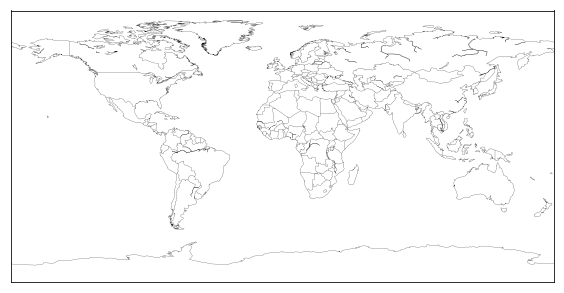

In [13]:
plt.figure(figsize = (10, 5))

world = Basemap()
world.drawcoastlines(linewidth = 0.2)
world.drawcountries(linewidth = 0.2)

Let's add the cities with a red marker

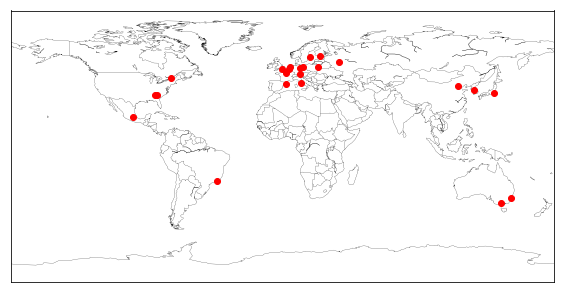

In [14]:
plt.figure(figsize = (10, 5))

world = Basemap()
world.drawcoastlines(linewidth = 0.2)
world.drawcountries(linewidth = 0.2)

for city, pos in locations.items():
    world.plot(pos.longitude, pos.latitude, 'r.', markersize = 12, latlon = True)

In [17]:
# let's check the locations to see if there is something strange...
locations

{'Athens': Location(Athens, Athens-Clarke County, Georgia, 303341458, USA, (33.9597677, -83.376398, 0.0)),
 'Paris': Location(Paris, Île-de-France, France métropolitaine, France, (48.8566101, 2.3514992, 0.0)),
 'St': Location(Sachsen-Anhalt, Deutschland, (51.908526, 11.4939134, 0.0)),
 'London': Location(London, Greater London, England, SW1A 2DX, UK, (51.5073219, -0.1276474, 0.0)),
 'Stockholm': Location(Sthlm, Stockholm, Stockholms län, Svealand, 111 29, Sverige, (59.3251172, 18.0710935, 0.0)),
 'Antwerp': Location(Antwerpen, Vlaanderen, België / Belgique / Belgien, (51.2211097, 4.3997081, 0.0)),
 'Amsterdam': Location(Amsterdam, Noord-Holland, Nederland, (52.3745403, 4.89797550561798, 0.0)),
 'Los': Location(Лось, Р83, Каменюкский сельский Совет, Каменецкий район, Брестская область, Беларусь, (52.5740021, 23.7958417801346, 0.0)),
 'Berlin': Location(Berlin, 10117, Deutschland, (52.5170365, 13.3888599, 0.0)),
 'Helsinki': Location(asema, 1, Kaivokatu, Keskusta, Kluuvi, Eteläinen suurp

In [18]:
# Athens isn't the city in America but rather the Greece's capital
# Rome isn't situated in Africa, there hasn't been any olympic games in this continent
# Let's be more specific to correct these entries
locations['Rome'] = geolocator.geocode('Rome', 'Italy')
locations['Athens'] = geolocator.geocode('Athens', 'Greece')

In [19]:
locations['Rome']

Location(Roma, RM, LAZ, Italia, (41.894802, 12.4853384, 0.0))

In [20]:
locations['Athens']

Location(Athens, Athens-Clarke County, Georgia, 303341458, USA, (33.9597677, -83.376398, 0.0))

Let's do a plot again

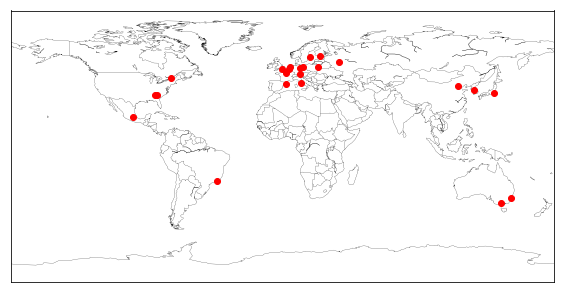

In [23]:
plt.figure(figsize = (10, 5))

world = Basemap()
world.drawcoastlines(linewidth = 0.2)
world.drawcountries(linewidth = 0.2)

for city, pos in locations.items():
    world.plot(pos.longitude, pos.latitude, 'r.', markersize = 12, latlon = True)

## Using the power of itertools and derived iterators 

In [37]:
# This list comprehension returns a list of tuples:
[(i,j) for i in range(3) for j in 'abc']

[(0, 'a'),
 (0, 'b'),
 (0, 'c'),
 (1, 'a'),
 (1, 'b'),
 (1, 'c'),
 (2, 'a'),
 (2, 'b'),
 (2, 'c')]

In [38]:
# this a list of dicts:
[{i:j} for i in range(3) for j in 'abc']

[{0: 'a'},
 {0: 'b'},
 {0: 'c'},
 {1: 'a'},
 {1: 'b'},
 {1: 'c'},
 {2: 'a'},
 {2: 'b'},
 {2: 'c'}]

In [39]:
# a list of lists:
[[i,j] for i in range(3) for j in 'abc']

[[0, 'a'],
 [0, 'b'],
 [0, 'c'],
 [1, 'a'],
 [1, 'b'],
 [1, 'c'],
 [2, 'a'],
 [2, 'b'],
 [2, 'c']]

In [40]:
[t for t in enumerate('abcdef') ] 

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd'), (4, 'e'), (5, 'f')]

In [29]:
# use of a tuple with enumerate
for i, city in enumerate(cities[:10]):
    print(i, city)

0 Athens
1 Paris
2 St
3 London
4 Stockholm
5 Antwerp
6 Paris
7 Amsterdam
8 Los
9 Berlin


In [33]:
# to get the whole thing in a list of tuples
[(i, city) for i, city in enumerate(cities[:10])]

[(0, 'Athens'),
 (1, 'Paris'),
 (2, 'St'),
 (3, 'London'),
 (4, 'Stockholm'),
 (5, 'Antwerp'),
 (6, 'Paris'),
 (7, 'Amsterdam'),
 (8, 'Los'),
 (9, 'Berlin')]

In [44]:
# again a list of tuples
[city for city in enumerate(cities[:10])]

[(0, 'Athens'),
 (1, 'Paris'),
 (2, 'St'),
 (3, 'London'),
 (4, 'Stockholm'),
 (5, 'Antwerp'),
 (6, 'Paris'),
 (7, 'Amsterdam'),
 (8, 'Los'),
 (9, 'Berlin')]

In [46]:
[print(city) for city in sorted(cities[:5])]

Athens
London
Paris
St
Stockholm


[None, None, None, None, None]

In [47]:
for city in sorted(cities[:5]):
    print(city)

Athens
London
Paris
St
Stockholm


In [49]:
# sort by length
for city in sorted(cities[:5], key=len):
    print(city)

St
Paris
Athens
London
Stockholm


In [56]:
# with composed functions - get a list of tuples
for city in enumerate(reversed(cities[:10])):
    print(city)

(0, 'Berlin')
(1, 'Los')
(2, 'Amsterdam')
(3, 'Paris')
(4, 'Antwerp')
(5, 'Stockholm')
(6, 'London')
(7, 'St')
(8, 'Paris')
(9, 'Athens')


In [57]:
# with composed functions
for i, city in enumerate(reversed(cities[:10])):
    print(i, city)

0 Berlin
1 Los
2 Amsterdam
3 Paris
4 Antwerp
5 Stockholm
6 London
7 St
8 Paris
9 Athens


In [59]:
for year, city in zip(years[:8], cities):
    print(year, city)

1896 Athens
1900 Paris
1904 St
1908 London
1912 Stockholm
1920 Antwerp
1924 Paris
1928 Amsterdam


## In order to code efficient loops, you can also use map, filter and the following iterators in itertools:
    - concatenate: itertools.chain(iter1, iter2)
    - duplicate: i1, i2 = itertools.tee(iter, 2)
    - sum: itertools.accumulate(iter)
    - elt by elt product: itertools.product(iter1, iter2)
    - permutations: itertools.permutations(string)
    - combinations: itertools.combinations(string)    